In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from depth_rebasing.Md import Md, normalize

In [2]:
#depth estimation using midas_small
%run "depth_estimation\run.py"

initialize
device: cpu
Loading weights:  depth_estimation/weights/midas_v21_small-70d6b9c8.pt


Using cache found in C:\Users\Admin/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master


start processing
finished


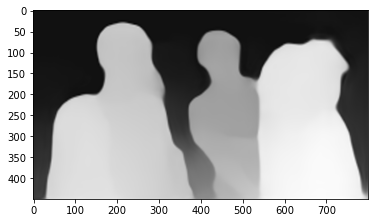

In [3]:
# visualization of result
# all tou have to change is the image name
img= cv.imread('depth_estimation/output/test_image.png')
plt.imshow(img)


In [4]:
print(np.shape(img))

(450, 800, 3)


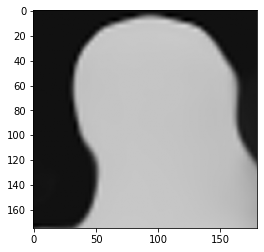

In [5]:
# depth rebasing
# using the same image for depth estimation, we will crop the head image of ont individual 

# normalize the origin depth map
img=normalize(img)
#cropped head
cropped_head= img[25:200,120:300]
plt.imshow(cropped_head)


In [1]:
depth_map=Md(img, cropped_head, -0.1)  # random value for gz
plt.imshow(depth_map)
plt.scatter(667, 448)
print(depth_map.shape)

# for the head cropped, the gaze is forward so we have a negative value f gz, for now we give it a random value to do a test
# the result seems to be correct, everything behind the cropped face is darker, and what is in front is brighter

NameError: name 'Md' is not defined

In [22]:
ind = np.unravel_index(np.argmax(depth_map, axis=None), depth_map.shape) # detect maximum on depth map

In [23]:
print(ind) #np.where(a == a.max() )

(448, 667, 0)
